<a href="https://colab.research.google.com/github/radhika1234567/Age-related-condition/blob/main/Copy_of_Copy_of_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, precision_recall_curve


In [2]:
#import all the necessary libraries
import warnings
warnings.filterwarnings("ignore")

from numpy import mean
from numpy import std
import pandas as pd
import numpy as np
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold,RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
import matplotlib.pyplot as plt

In [3]:
plt.style.use("ggplot")
plt.rcParams["axes.labelweight"] = "bold"
warnings.simplefilter('ignore')

In [6]:
!pip install xgboost

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
cd "/content/drive/My Drive/roja/ICR-main"

/content/drive/My Drive/roja/ICR-main


In [9]:
df = pd.read_csv("train.csv")

In [10]:
df.isna().sum().sort_values(ascending=False)

EL       60
BQ       60
CC        3
FS        2
CB        2
FL        1
FC        1
DU        1
GL        1
EE        0
EB        0
EU        0
DY        0
EH        0
EJ        0
DV        0
EP        0
EG        0
Id        0
DL        0
FD        0
FE        0
FI        0
FR        0
GB        0
GE        0
GF        0
GH        0
GI        0
DN        0
DH        0
DI        0
BR        0
AF        0
AH        0
AM        0
AR        0
AX        0
AY        0
AZ        0
BC        0
BD        0
BN        0
BP        0
BZ        0
AB        0
CD        0
CF        0
CH        0
CL        0
CR        0
CS        0
CU        0
CW        0
DA        0
DE        0
DF        0
Class     0
dtype: int64

In [11]:
df['EJ']=df['EJ'].map({'A':0,'B':1})

Text(0, 0.5, 'Frequency')

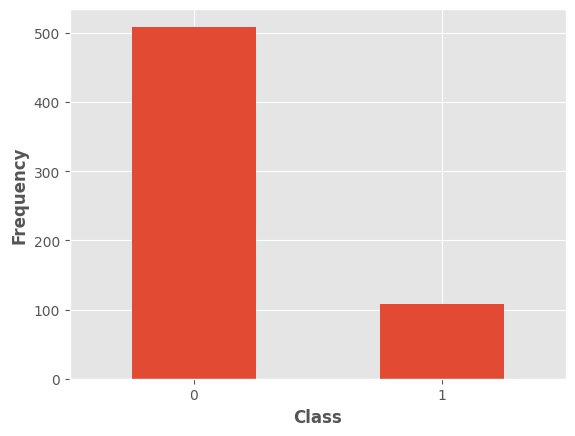

In [12]:
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [13]:
misscol = [col for col in df.columns if df[col].isna().sum() !=0]

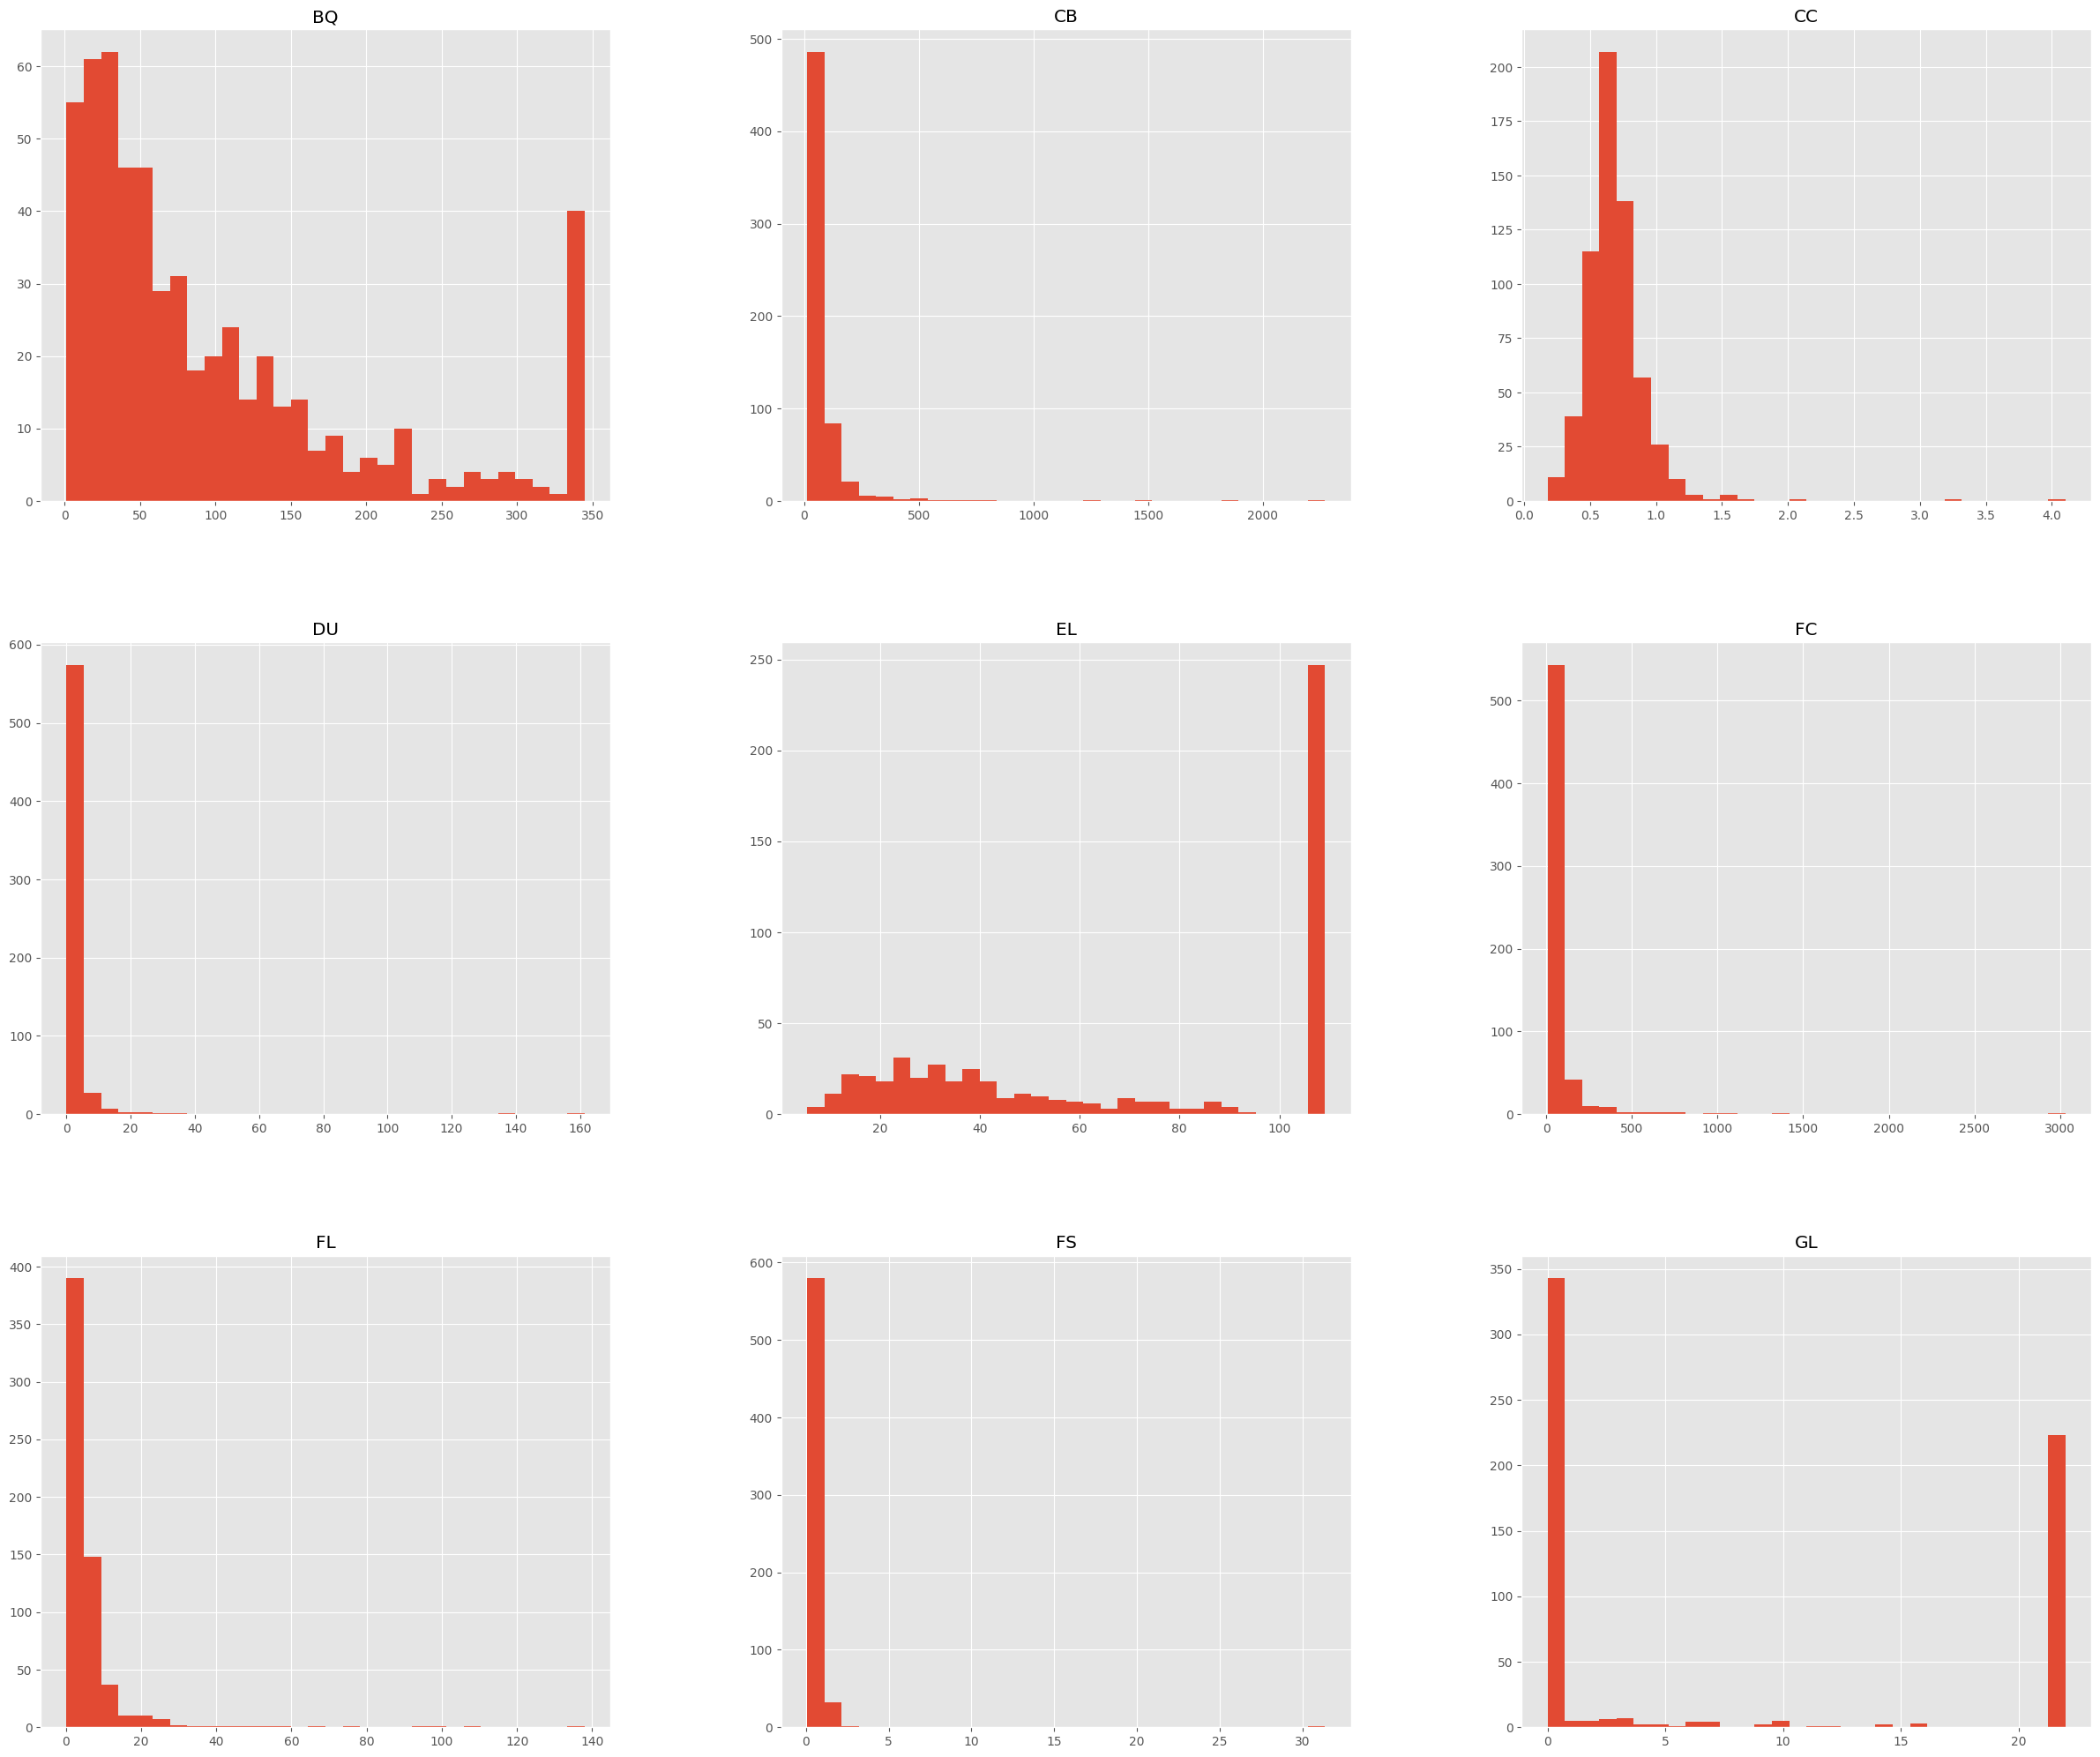

In [14]:
df[misscol].hist(figsize = (30, 25), bins = 30, legend = False)
plt.show()

In [15]:
df['EL'] = df['EL'].fillna((df['EL'].median()))
df['BQ'] = df['BQ'].fillna((df['BQ'].median()))
df['CC'] = df['CC'].fillna((df['CC'].median()))
df['FS'] = df['FS'].fillna((df['FS'].median()))
df['CB'] = df['CB'].fillna((df['CB'].median()))
df['FL'] = df['FL'].fillna((df['FL'].median()))
df['FC'] = df['FC'].fillna((df['FC'].median()))
df['DU'] = df['DU'].fillna((df['DU'].median()))
df['GL'] = df['GL'].fillna((df['GL'].median()))

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      617 non-null    object 
 1   AB      617 non-null    float64
 2   AF      617 non-null    float64
 3   AH      617 non-null    float64
 4   AM      617 non-null    float64
 5   AR      617 non-null    float64
 6   AX      617 non-null    float64
 7   AY      617 non-null    float64
 8   AZ      617 non-null    float64
 9   BC      617 non-null    float64
 10  BD      617 non-null    float64
 11  BN      617 non-null    float64
 12  BP      617 non-null    float64
 13  BQ      617 non-null    float64
 14  BR      617 non-null    float64
 15  BZ      617 non-null    float64
 16  CB      617 non-null    float64
 17  CC      617 non-null    float64
 18  CD      617 non-null    float64
 19  CF      617 non-null    float64
 20  CH      617 non-null    float64
 21  CL      617 non-null    float64
 22  CR

In [17]:
df.set_index('Id',inplace = True)
df.head()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
Id,,,,,,,,,,,,,,,,,,,,,
000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,4126.58731,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,5496.92824,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,5135.78024,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,4169.67738,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,5728.73412,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


In [18]:
# Split the data
from sklearn.model_selection import train_test_split
X = df.drop(['Class'],axis= 1)
y = df.Class

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=123,stratify = y)

In [19]:
X_train.shape,y_train.shape

((493, 56), (493,))

In [20]:
X_test.shape,y_test.shape

((124, 56), (124,))

In [21]:
y_train.value_counts()

0    407
1     86
Name: Class, dtype: int64

In [22]:
#Scale the data
from sklearn.preprocessing import StandardScaler
import numpy as np
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [23]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)
X_train_oversampled,y_train_oversampled = smote.fit_resample(X_train,y_train)

In [24]:
X_train_oversampled.shape,y_train_oversampled.shape

((814, 56), (814,))

In [25]:
y_train_oversampled.value_counts()

1    407
0    407
Name: Class, dtype: int64

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, log_loss, confusion_matrix

# # Assuming you have already defined your classifier model and prepared your data X and y

# # Define a function to calculate balanced log-loss
# def balanced_log_loss(y_true, y_pred, eps=1e-15):
#     y_pred = np.clip(y_pred, eps, 1 - eps)  # Clip probabilities to avoid numerical instability
#     balanced_weights = np.sum(y_true, axis=0) / np.sum(y_true)  # Compute class weights
#     balanced_logloss = -np.sum(balanced_weights * y_true * np.log(y_pred)) / np.sum(balanced_weights)
#     return balanced_logloss

# # Use make_scorer to convert the custom function into a scorer
# scoring_metric = make_scorer(balanced_log_loss, greater_is_better=False, needs_proba=True)


In [27]:
from sklearn.utils.class_weight import compute_sample_weight
def balanced_log_loss_sklearn(y_true,y_pred):
    sample_weights = compute_sample_weight(class_weight = 'balanced',y=y_true)
    return log_loss(y_true,y_pred,sample_weight = sample_weights)



In [28]:
def balanced_log_loss_manual(y_true, y_pred):
    # y_true: correct labels 0, 1
    # y_pred: predicted probabilities of class=1
    # calculate the number of observations for each class
    N_0 = np.sum(1 - y_true)
    N_1 = np.sum(y_true)
    # calculate the weights for each class to balance classes
    w_0 = 1 / N_0
    w_1 = 1 / N_1
    # calculate the predicted probabilities for each class
    p_1 = np.clip(y_pred, 1e-15, 1 - 1e-15)
    p_0 = 1 - p_1
    # calculate the summed log loss for each class
    log_loss_0 = -np.sum((1 - y_true) * np.log(p_0))
    log_loss_1 = -np.sum(y_true * np.log(p_1))
    # calculate the weighted summed logarithmic loss
    # (factgor of 2 included to give same result as LL with balanced input)
    balanced_log_loss = 2*(w_0 * log_loss_0 + w_1 * log_loss_1) / (w_0 + w_1)
    # return the average log loss
    return balanced_log_loss/(N_0+N_1)

Negative balanced log loss might suggest the following:

* The model's predicted probabilities for the majority class (class 0) are highly confident and close to 0.
* The class imbalance is significantly affecting the computation of the balanced log loss.
* The negative value is an artifact of the way the log loss is weighted and balanced across classes.

While a negative balanced log loss might be mathematically possible due to these factors, it's important to interpret it in context. Negative balanced log loss doesn't change the fundamental interpretation of log loss—it's still a measure of prediction quality, with lower values indicating better predictions.

In [29]:
scoring_metric_manual = make_scorer(balanced_log_loss_manual, greater_is_better=False, needs_proba=True)

#define evaluation procedure
def evaluate_model_manual(X, y, model):
    cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 5, random_state = 1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring=scoring_metric_manual, cv=cv, n_jobs=-1)

    return scores

>SVM -0.149 (0.048)
>KNN -1.018 (0.422)
>RF -0.180 (0.012)
>LogReg -0.288 (0.077)
>XGB -0.093 (0.035)


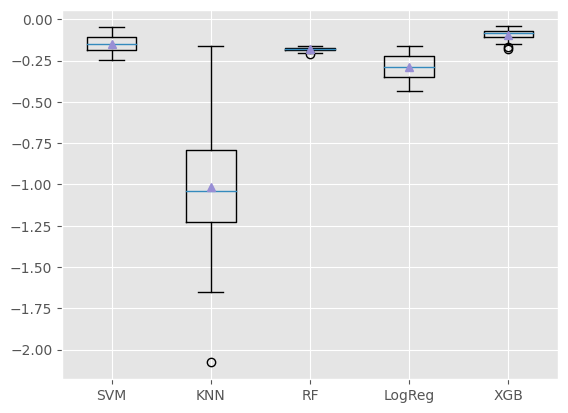

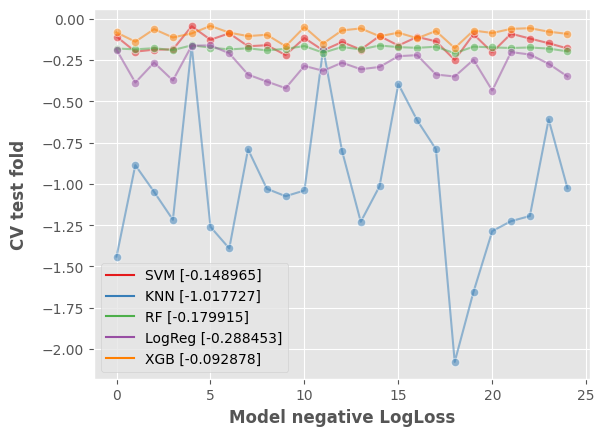

In [30]:
#MANUAL BALANCED LOGLOSS
# define models to test
def get_models():
    models, names = list(), list()

    # SVM
    models.append(SVC(gamma='auto',probability=True))
    names.append('SVM')

    # KNN
    models.append(KNeighborsClassifier())
    names.append('KNN')

    # RF
    models.append(RandomForestClassifier(n_estimators=500))
    names.append('RF')

    #LogisticRegression
    models.append(LogisticRegression())
    names.append('LogReg')

    #XGB
    models.append(xgb.XGBClassifier(n_estimators = 500))
    names.append('XGB')
    return models, names

# define models
models, names = get_models()
results = list()


# evaluate each model
for i in range(len(models)):
    # evaluate the model and store results
    scores = evaluate_model_manual(X_train_oversampled, y_train_oversampled, models[i])
    results.append(scores)
    # summarize performance
    print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))


# plot the results
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

dic = {f'SVM [{round(np.mean(results[0]),6)}]' : [],
       f'KNN [{round(np.mean(results[1]),6)}]' : [],
      f'RF [{round(np.mean(results[2]),6)}]' : [],
      f'LogReg [{round(np.mean(results[3]),6)}]' : [],
      f'XGB [{round(np.mean(results[4]),6)}]' : []}
sns.lineplot(data = dict(zip(dic,results)),
            dashes = False,
            palette = "Set1",marker = "o",
            alpha = 0.5)
plt.xlabel("Model negative LogLoss")
plt.ylabel("CV test fold",labelpad =  10)
plt.show()

In [31]:
scoring_metric_sklearn = make_scorer(balanced_log_loss_sklearn, greater_is_better=False, needs_proba=True)
#define evaluation procedure
def evaluate_model_sklearn(X, y, model):
    cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 5, random_state = 1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring=scoring_metric_sklearn, cv=cv, n_jobs=-1)

    return scores

>SVM -0.149 (0.047)
>KNN -1.054 (0.441)
>RF -0.180 (0.013)
>LogReg -0.288 (0.077)
>XGB -0.093 (0.035)


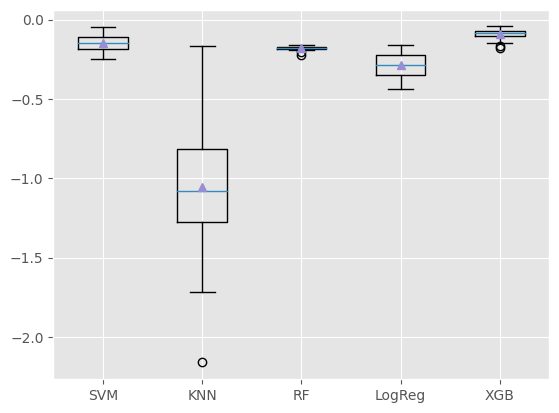

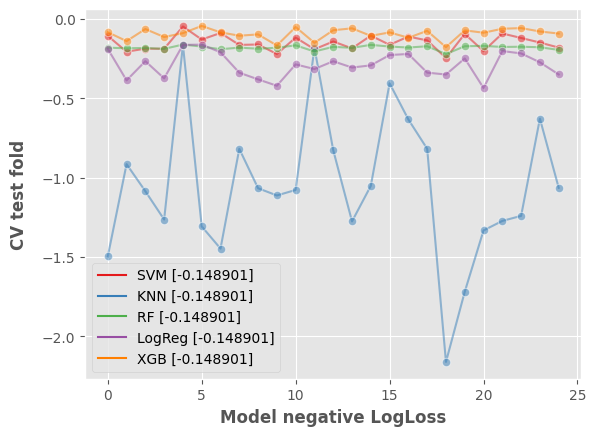

In [32]:
#SKLEARN BALANCED LOGLOSS
# define models to test
def get_models():
    models, names = list(), list()

    # SVM
    models.append(SVC(gamma='auto',probability=True))
    names.append('SVM')

    # KNN
    models.append(KNeighborsClassifier())
    names.append('KNN')

    # RF
    models.append(RandomForestClassifier(n_estimators=500))
    names.append('RF')

    #LogisticRegression
    models.append(LogisticRegression())
    names.append('LogReg')

    #XGB
    models.append(xgb.XGBClassifier(n_estimators = 500))
    names.append('XGB')
    return models, names

# define models
models, names = get_models()
results = list()


# evaluate each model
for i in range(len(models)):
    # evaluate the model and store results
    scores = evaluate_model_sklearn(X_train_oversampled, y_train_oversampled, models[i])
    results.append(scores)
    # summarize performance
    print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))


# plot the results
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

dic = {f'SVM [{round(np.mean(results[0]),6)}]' : [],
       f'KNN [{round(np.mean(results[0]),6)}]' : [],
      f'RF [{round(np.mean(results[0]),6)}]' : [],
      f'LogReg [{round(np.mean(results[0]),6)}]' : [],
      f'XGB [{round(np.mean(results[0]),6)}]' : []}
sns.lineplot(data = dict(zip(dic,results)),
            dashes = False,
            palette = "Set1",marker = "o",
            alpha = 0.5)
plt.xlabel("Model negative LogLoss")
plt.ylabel("CV test fold",labelpad =  10)
plt.show()

In [33]:
# # Logistic Regression
# logreg = LogisticRegression()
# logreg.fit(X_train_oversampled, y_train_oversampled)
# logreg_predictions = logreg.predict_proba(X_test)
# logreg_logloss = balanced_log_loss_sklearn(y_test, logreg_predictions)
# print("Log Loss (Logistic Regression):", logreg_logloss)

# # Support Vector Machines (SVM)
# svm = SVC(probability=True)
# svm.fit(X_train_oversampled, y_train_oversampled)
# svm_predictions = svm.predict_proba(X_test)
# svm_logloss = balanced_log_loss_sklearn(y_test, svm_predictions)
# print("Log Loss (SVM):", svm_logloss)

# # Random Forest
# rf = RandomForestClassifier()
# rf.fit(X_train_oversampled, y_train_oversampled)
# rf_predictions = rf.predict_proba(X_test)
# rf_logloss = balanced_log_loss_sklearn(y_test, rf_predictions)
# print("Log Loss (Random Forest):", rf_logloss)



# xg = xgb.XGBClassifier(n_estimators = 1000)
# xg.fit(X_train_oversampled, y_train_oversampled)
# xg_predictions = xg.predict_proba(X_test)
# xg_logloss = balanced_log_loss_sklearn(y_test, xg_predictions)
# print("Log Loss (XGBOOST):", xg_logloss)


In [34]:
# # Logistic Regression
# logreg = LogisticRegression()
# logreg.fit(X_train_oversampled, y_train_oversampled)
# logreg_predictions = logreg.predict_proba(X_test)
# logreg_logloss = balanced_log_loss_manual(y_test, logreg_predictions[:, 1])
# print("Log Loss (Logistic Regression):", logreg_logloss)

# # Support Vector Machines (SVM)
# svm = SVC(probability=True)
# svm.fit(X_train_oversampled, y_train_oversampled)
# svm_predictions = svm.predict_proba(X_test)
# svm_logloss = balanced_log_loss_manual(y_test, svm_predictions[:,1])
# print("Log Loss (SVM):", svm_logloss)

# # Random Forest
# rf = RandomForestClassifier()
# rf.fit(X_train_oversampled, y_train_oversampled)
# rf_predictions = rf.predict_proba(X_test)
# rf_logloss = balanced_log_loss_manual(y_test, rf_predictions[:,1])
# print("Log Loss (Random Forest):", rf_logloss)



# xg = xgb.XGBClassifier(n_estimators = 1000)
# xg.fit(X_train_oversampled, y_train_oversampled)
# xg_predictions = xg.predict_proba(X_test)
# xg_logloss = balanced_log_loss_manual(y_test, xg_predictions[:,1])
# print("Log Loss (XGBOOST):", xg_logloss)


### XGBOOST

In [35]:
# Create and train the XGBoost model
from sklearn import metrics
from xgboost import XGBClassifier
model_xgb = XGBClassifier(n_estimators=500, random_state=1, n_jobs=-1)
model_res = model_xgb.fit(X_train_oversampled, y_train_oversampled)

# Set up cross-validation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=1)

# Create the custom scoring metric
scoring_metric = make_scorer(balanced_log_loss_manual, greater_is_better=False, needs_proba=True)

# Evaluate model using cross-validation
scores = cross_val_score(model_res, X_train_oversampled, y_train_oversampled, scoring=scoring_metric, cv=cv, n_jobs=-1)

# Make predictions and evaluate the model on the test set
y_pred = model_res.predict(X_test)
ac = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

# Print results
print("Balanced logloss: ", abs(np.mean(scores)))
print("train accuracy: ", model_res.score(X_train_oversampled, y_train_oversampled))
print("test accuracy: ", model_res.score(X_test, y_test))
print('XGBoost: Accuracy=%.3f' % (ac))
print('XGBoost: f1-score=%.3f' % (f1))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
auc = metrics.roc_auc_score(y_test, model_res.predict(X_test))
print("auc=%.3f" % auc)

Balanced logloss:  0.09287785273459769
train accuracy:  1.0
test accuracy:  0.9112903225806451
XGBoost: Accuracy=0.911
XGBoost: f1-score=0.910
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       102
           1       0.76      0.73      0.74        22

    accuracy                           0.91       124
   macro avg       0.85      0.84      0.85       124
weighted avg       0.91      0.91      0.91       124

[[97  5]
 [ 6 16]]
auc=0.839


In [36]:
data_dict = {'True Label (y_test)': y_test, 'Predicted Probability (y_pred)': y_pred}

# Create a pandas DataFrame from the dictionary
df_comparison = pd.DataFrame(data_dict)

# Display the DataFrame
df_comparison

,True Label (y_test),Predicted Probability (y_pred)
Id,,
a20c68851e9b,0,0
3a73fce81608,0,0
55122c3c02a0,0,0
810ff5afd0e2,0,0
7c21c57859d6,0,0
...,...,...
c9e8391da0ea,0,0
c7f5064f4265,1,1
f003d68995be,0,0


In [37]:
df_comparison[df_comparison['True Label (y_test)'] != df_comparison['Predicted Probability (y_pred)']]

,True Label (y_test),Predicted Probability (y_pred)
Id,,
3924089e4396,1,0
49b8f248a42f,1,0
24b40510d6a2,1,0
ed3486389307,1,0
60474d8ff770,0,1
58dcdd9d6e89,0,1
8e5a0d625d98,0,1
8803ec4462c1,1,0
e2ef2a51ed65,0,1


In [38]:
df_comparison[df_comparison['True Label (y_test)'] != df_comparison['Predicted Probability (y_pred)']].shape

(11, 2)

In [39]:
#calculate precision and recall
def plot_precision_recall_curve(y_test, y_pred):
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

    #create precision recall curve
    fig, ax = plt.subplots()
    ax.plot(recall, precision, color='purple')

    #add axis labels to plot
    ax.set_title('Precision-Recall Curve')
    ax.set_ylabel('Precision')
    ax.set_xlabel('Recall')

    #display plot
    plt.show()


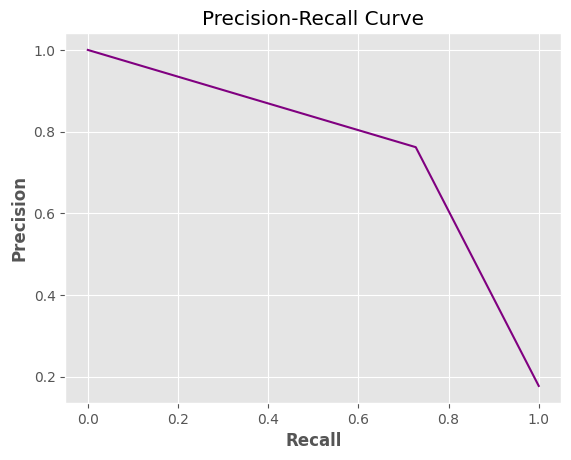

In [40]:
plot_precision_recall_curve(y_test, y_pred)

In [41]:
from sklearn import metrics
def plot_roc_curve(y_test, y_pred):
    auc = metrics.roc_auc_score(y_test, y_pred)
    false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred)
    plt.figure(figsize=(10, 8), dpi=100)
    plt.axis('scaled')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.title("AUC & ROC Curve")
    plt.plot(false_positive_rate, true_positive_rate, 'g')
    plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()


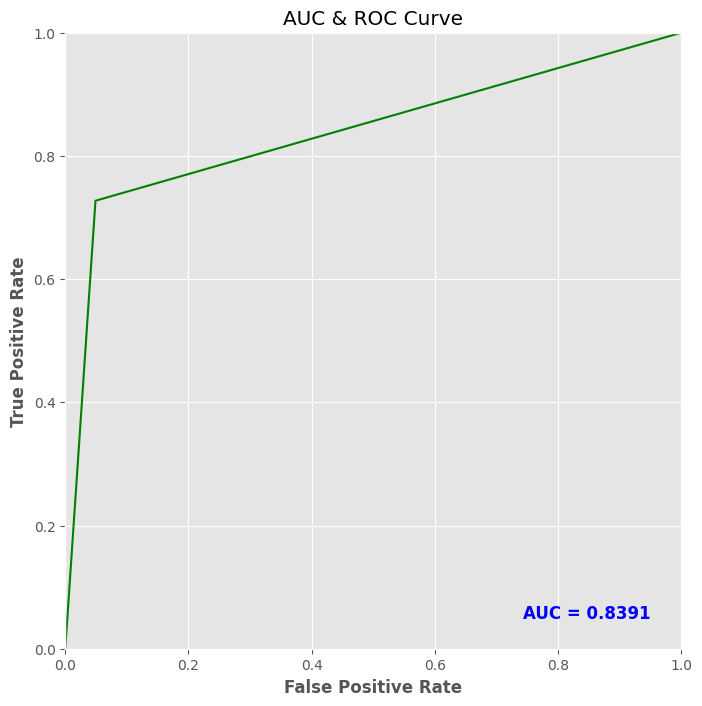

In [42]:
plot_roc_curve(y_test, y_pred)

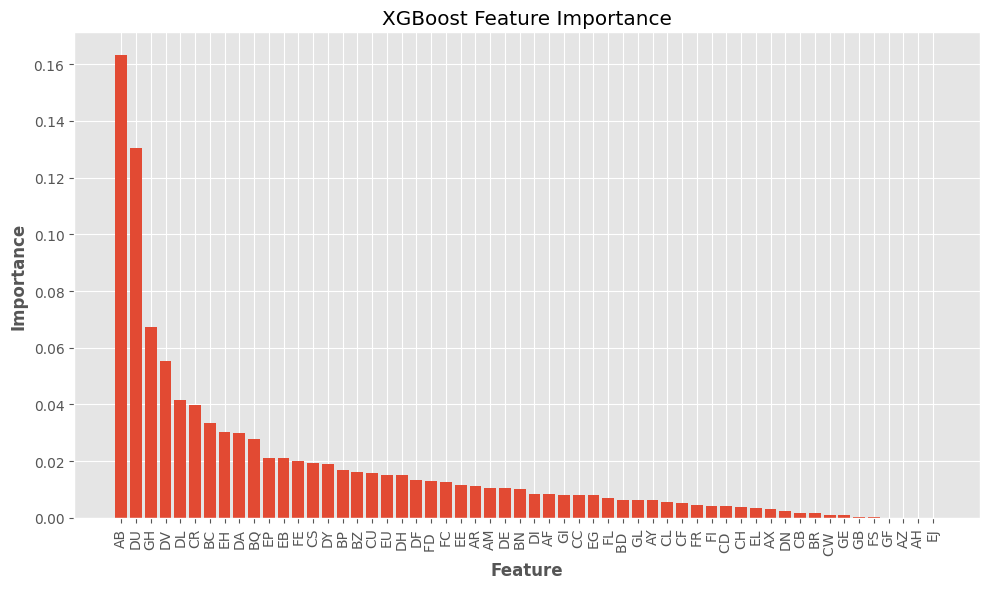

In [43]:
#Get feature importances
importances = model_xgb.feature_importances_

# Get feature names
feature_names = X.columns

# Sort feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), sorted_importances, align='center')
plt.xticks(range(X_train.shape[1]), sorted_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('XGBoost Feature Importance')
plt.tight_layout()
plt.show()

In [44]:
X_train.shape

(493, 56)

In [45]:
sorted_feature_names

Index(['AB', 'DU', 'GH', 'DV', 'DL', 'CR', 'BC', 'EH', 'DA', 'BQ', 'EP', 'EB',
       'FE', 'CS', 'DY', 'BP', 'BZ', 'CU', 'EU', 'DH', 'DF', 'FD ', 'FC', 'EE',
       'AR', 'AM', 'DE', 'BN', 'DI', 'AF', 'GI', 'CC', 'EG', 'FL', 'BD ', 'GL',
       'AY', 'CL', 'CF', 'FR', 'FI', 'CD ', 'CH', 'EL', 'AX', 'DN', 'CB', 'BR',
       'CW ', 'GE', 'GB', 'FS', 'GF', 'AZ', 'AH', 'EJ'],
      dtype='object')

In [46]:
rounded_importances = [x for x in sorted_importances if round(x, 4)<=0]
print(len(rounded_importances))

3


In [47]:
dict(zip(sorted_feature_names,sorted_importances))

{'AB': 0.16310722,
 'DU': 0.13028713,
 'GH': 0.067384556,
 'DV': 0.055152692,
 'DL': 0.041716315,
 'CR': 0.039666224,
 'BC': 0.033625588,
 'EH': 0.030382477,
 'DA': 0.029915215,
 'BQ': 0.027831115,
 'EP': 0.021060258,
 'EB': 0.021000318,
 'FE': 0.020180434,
 'CS': 0.019268984,
 'DY': 0.019159736,
 'BP': 0.016823059,
 'BZ': 0.01606889,
 'CU': 0.01598572,
 'EU': 0.015258794,
 'DH': 0.014993483,
 'DF': 0.013232571,
 'FD ': 0.013070456,
 'FC': 0.012477013,
 'EE': 0.011500031,
 'AR': 0.011123833,
 'AM': 0.010530719,
 'DE': 0.01036338,
 'BN': 0.0101390965,
 'DI': 0.008374071,
 'AF': 0.00827749,
 'GI': 0.008121317,
 'CC': 0.0079860445,
 'EG': 0.007889731,
 'FL': 0.006864321,
 'BD ': 0.0063713775,
 'GL': 0.006263434,
 'AY': 0.0062115584,
 'CL': 0.0055407076,
 'CF': 0.005088833,
 'FR': 0.004403112,
 'FI': 0.0041300254,
 'CD ': 0.004063277,
 'CH': 0.003898682,
 'EL': 0.0035736582,
 'AX': 0.0030600566,
 'DN': 0.0025123053,
 'CB': 0.0018481987,
 'BR': 0.0018414652,
 'CW ': 0.0010529916,
 'GE': 0.0

In [86]:
%%time
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer




def balanced_log_loss_manual(y_true, y_pred):
    # y_true: correct labels 0, 1
    # y_pred: predicted probabilities of class=1
    # calculate the number of observations for each class
    N_0 = np.sum(1 - y_true)
    N_1 = np.sum(y_true)
    # calculate the weights for each class to balance classes
    w_0 = 1 / N_0
    w_1 = 1 / N_1
    # calculate the predicted probabilities for each class
    p_1 = np.clip(y_pred, 1e-15, 1 - 1e-15)
    p_0 = 1 - p_1
    # calculate the summed log loss for each class
    log_loss_0 = -np.sum((1 - y_true) * np.log(p_0))
    log_loss_1 = -np.sum(y_true * np.log(p_1))
    # calculate the weighted summed logarithmic loss
    # (factgor of 2 included to give same result as LL with balanced input)
    balanced_log_loss = 2*(w_0 * log_loss_0 + w_1 * log_loss_1) / (w_0 + w_1)
    # return the average log loss
    return balanced_log_loss/(N_0+N_1)


# Create an instance of XGBClassifier with early stopping
xgbc = XGBClassifier(random_state=42, objective='binary:logistic',class_weight = 'balanced')

# Define the hyperparameter grid
xgbc_param = {
    'max_depth': [3,4,5,6,7,8],
    'n_estimators': [400,600,800,1000],
    'learning_rate': [0.1,0.2,0.3, 0.5, 0.6, 0.8],
    'min_child_weight': [1,2,3,4,5,6,7,8,10],
    'subsample': [0.6, 0.7, 0.8, 0.9],
    'colsample_bytree': np.arange(0.4, 1.0, 0.1),
  'colsample_bylevel': np.arange(0.4, 1.0, 0.1)
}

# Set up cross-validation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)

scoring = {
           'Balanced_logloss': make_scorer(balanced_log_loss_manual, greater_is_better=False, needs_proba=True)
          }

#
# Set up RandomizedSearchCV
xgbc_random = RandomizedSearchCV(
    xgbc, xgbc_param, cv=cv, return_train_score=True, scoring=scoring, n_iter=50,
    verbose=2, random_state =1, n_jobs = -1,refit='Balanced_logloss'
)

# Define the evaluation set
#eval_set = [(X_train_oversampled, y_train_oversampled), (X_test, y_test)]

# Fit RandomizedSearchCV with custom evaluation function and eval_set
xgbc_random.fit(X_train_oversampled, y_train_oversampled, verbose=True)

# Print the best parameters found by RandomizedSearchCV
print("Best Parameters:", xgbc_random.best_params_)

Fitting 25 folds for each of 50 candidates, totalling 1250 fits
[16:35:55] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.

Best Parameters: {'subsample': 0.6, 'n_estimators': 800, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.5, 'colsample_bylevel': 0.4}
CPU times: user 12 s, sys: 1.11 s, total: 13.1 s
Wall time: 8min


In [87]:
print("Best Accuracy:", xgbc_random.best_score_)

Best Accuracy: -0.07526481308078725


In [105]:
# Create and train the XGBoost model
from xgboost import XGBClassifier
model_xgb_final = XGBClassifier(n_estimators=400, max_depth=4,learning_rate=0.1,min_child_weight=1,subsample=0.6, colsample_bytree= 0.5,colsample_bylevel=0.4,random_state=42, n_jobs=-1)
model_res = model_xgb_final.fit(X_train_oversampled, y_train_oversampled)
#Best Parameters: {'subsample': 0.6, 'n_estimators': 400, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.4, 'colsample_bylevel': 0.4}

# Set up cross-validation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=1)

# Create the custom scoring metric
scoring_metric = make_scorer(balanced_log_loss_manual, greater_is_better=False, needs_proba=True)

# Evaluate model using cross-validation
scores = cross_val_score(model_xgb_final, X_train_oversampled, y_train_oversampled, scoring=scoring_metric, cv=cv, n_jobs=-1)

# Make predictions and evaluate the model on the test set
y_pred = model_res.predict(X_test)
ac = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

# Print results
print("Balanced logloss: ", abs(np.mean(scores)))
#print(balanced_log_loss_manual(y_pred, model_res.predict(X_test)[:,1]))
print("train accuracy: ", model_res.score(X_train_oversampled, y_train_oversampled))
print("test accuracy: ", model_res.score(X_test, y_test))
print('XGBoost: Accuracy=%.3f' % (ac))
print('XGBoost: f1-score=%.3f' % (f1))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
auc = metrics.roc_auc_score(y_test, model_res.predict(X_test))
print("auc=%.3f" % auc)

Balanced logloss:  0.07967570139825199
train accuracy:  1.0
test accuracy:  0.9112903225806451
XGBoost: Accuracy=0.911
XGBoost: f1-score=0.912
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       102
           1       0.74      0.77      0.76        22

    accuracy                           0.91       124
   macro avg       0.84      0.86      0.85       124
weighted avg       0.91      0.91      0.91       124

[[96  6]
 [ 5 17]]
auc=0.857


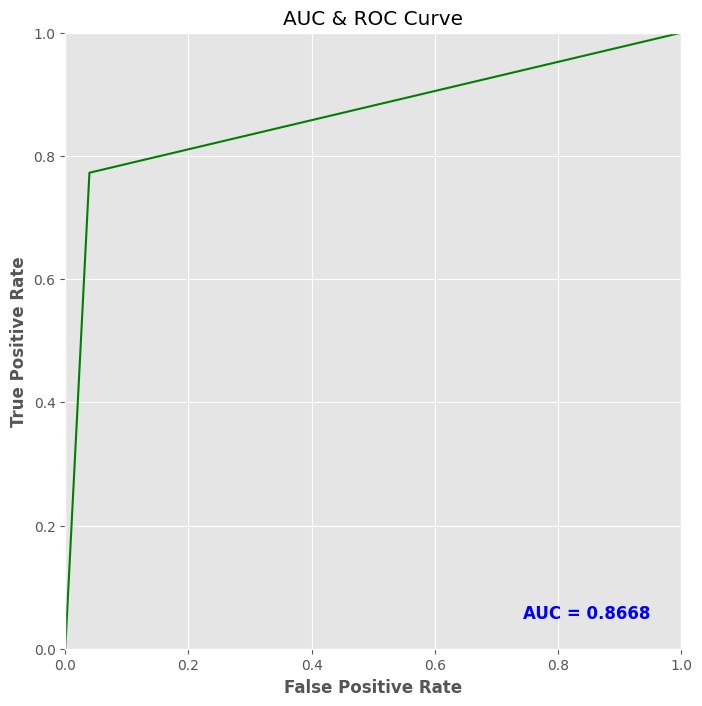

In [76]:
plot_roc_curve(y_test, y_pred)

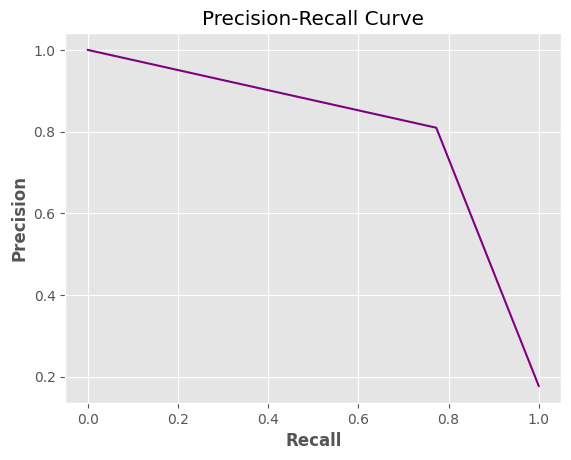

In [77]:
plot_precision_recall_curve(y_test, y_pred)

In [82]:
model_res.feature_importances_

array([0.06794193, 0.02235204, 0.016112  , 0.0077345 , 0.01223774,
       0.00708967, 0.01134469, 0.00501649, 0.03582135, 0.01132885,
       0.0197953 , 0.00357046, 0.03735666, 0.01068866, 0.00994088,
       0.00743955, 0.01962028, 0.02171939, 0.01000569, 0.00714181,
       0.01764611, 0.03211202, 0.00884444, 0.0102805 , 0.01007918,
       0.03645883, 0.019228  , 0.01011572, 0.01177086, 0.03404607,
       0.02630043, 0.01047708, 0.0939033 , 0.03134041, 0.02022215,
       0.02111893, 0.02031404, 0.01002775, 0.01316322, 0.00271639,
       0.00675434, 0.0103777 , 0.01239812, 0.01407111, 0.03442252,
       0.01337057, 0.00631721, 0.03847203, 0.01537543, 0.00518523,
       0.00325516, 0.00663379, 0.00838555, 0.01116703, 0.01775878,
       0.01163201], dtype=float32)

In [106]:
from sklearn.feature_selection import SelectFromModel
from numpy import sort
thresholds = sort(model_res.feature_importances_)
for thresh in thresholds:
    #select features using threshold
    selection = SelectFromModel(model_res, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train_oversampled)
    # train model
    selection_model = XGBClassifier(subsample= 0.6,
                                n_estimators= 400,
                                min_child_weight= 1,
                                max_depth= 4,
                                learning_rate= 0.1,
                                colsample_bytree= 0.5,
                                colsample_bylevel=0.4,
                                random_state=42)
    selection_model.fit(select_X_train, y_train_oversampled)
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    y_pred_proba = selection_model.predict_proba(select_X_test)
    #predictions = [round(value) for value in y_pred]
    #prediction = [value for value in y_pred1]
    accuracy = accuracy_score(y_test, y_pred)
    logloss = round(balanced_log_loss_manual(y_test, y_pred_proba[:,1]),3)
    Precisionscore = precision_score(y_test, y_pred)
    f1score = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    auc = metrics.roc_auc_score(y_test, y_pred, average='weighted')
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%, logloss=%.3f, precisionscore=%.3f, \
    F1score=%.3f, recall=%.3f, \
    auc=%.3f" % (thresh, select_X_train.shape[1], accuracy*100.0, logloss, Precisionscore, f1score, recall, auc))





Thresh=0.004, n=56, Accuracy: 91.13%, logloss=0.182, precisionscore=0.739,     F1score=0.756, recall=0.773,     auc=0.857
Thresh=0.004, n=55, Accuracy: 91.13%, logloss=0.240, precisionscore=0.762,     F1score=0.744, recall=0.727,     auc=0.839
Thresh=0.005, n=54, Accuracy: 92.74%, logloss=0.198, precisionscore=0.810,     F1score=0.791, recall=0.773,     auc=0.867
Thresh=0.006, n=53, Accuracy: 91.94%, logloss=0.216, precisionscore=0.773,     F1score=0.773, recall=0.773,     auc=0.862
Thresh=0.006, n=52, Accuracy: 92.74%, logloss=0.198, precisionscore=0.810,     F1score=0.791, recall=0.773,     auc=0.867
Thresh=0.006, n=51, Accuracy: 91.94%, logloss=0.219, precisionscore=0.800,     F1score=0.762, recall=0.727,     auc=0.844
Thresh=0.007, n=50, Accuracy: 91.94%, logloss=0.172, precisionscore=0.773,     F1score=0.773, recall=0.773,     auc=0.862
Thresh=0.007, n=49, Accuracy: 91.94%, logloss=0.227, precisionscore=0.773,     F1score=0.773, recall=0.773,     auc=0.862
Thresh=0.007, n=48, Accu

Best Parameters: {'subsample': 0.7, 'n_estimators': 400, 'min_child_weight': 1, 'max_depth': 8, 'learning_rate': 0.1, 'colsample_bytree': 0.4, 'colsample_bylevel': 0.5} 0.1999


Best Parameters: {'subsample': 0.7, 'n_estimators': 1000, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.3}

Best Parameters: {'subsample': 0.6, 'n_estimators': 400, 'min_child_weight': 1, 'max_depth': 4, 'learning_rate': 0.1, 'colsample_bytree': 0.4} 0.190

colsample_bytree 0.5
model_xgb_final = XGBClassifier(n_estimators=400, max_depth=4,learning_rate=0.1,min_child_weight=1,subsample=0.6, colsample_bytree= 0.5,colsample_bylevel=0.4,random_state=42, n_jobs=-1) 0.172



In [ ]:
importances = model.feature_importances_
top_indices = importances.argsort()[::-1][:52]
top_feature_names = X.columns[top_indices]
top_importances = importances[top_indices]

In [ ]:
top_feature_names

In [ ]:
X_train_df = pd.DataFrame(X_train_ns)
y_train_df = pd.DataFrame(y_train_ns)

In [ ]:
X_train_df.columns = X.columns

In [ ]:
X_train_df.columns

In [ ]:
col = [x for x in X_train_df.columns if x not in top_feature_names]

In [ ]:
X_train_df.drop(columns=col,axis=1,inplace=True)

In [ ]:
model = XGBClassifier(subsample= 0.6,
                                n_estimators= 1000,
                                min_child_weight= 1,
                                max_depth= 4,
                                learning_rate= 0.3,
                                random_state=42)

In [ ]:
model.fit(X_train_df, y_train_df)

In [ ]:
X_test_df = pd.DataFrame(X_test)

In [ ]:
X_test_df.columns = X.columns

In [ ]:
X_test_df.drop(columns=col,axis=1,inplace=True)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, precision_recall_curve
print('Accuracy: %.3f' % accuracy_score(y_test, model.predict(X_test_df)))
from sklearn.metrics import log_loss
logloss = log_loss(y_test, model.predict_proba(X_test_df))
print("logloss: ",round(logloss,4))
f1= f1_score(y_test,model.predict(X_test_df), average='binary')
print("F1-score: ", round(f1,4))
print('Precision: %.3f' % precision_score(y_test, model.predict(X_test_df)))
print('Recall: %.3f' % recall_score(y_test, model.predict(X_test_df)))
auc = metrics.roc_auc_score(y_test, model.predict(X_test_df))
print("auc=%.3f" % auc)